<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**
    
Hi Elvis! 👋 Awesome job on this project! You’ve delivered a **clear, well-structured, and effective notebook** that ticks all the required boxes. Here’s my detailed feedback for you:

---

**🟢 Strengths**
    
- **Clear Objectives & Organization:** Your goals were outlined clearly, and the notebook followed a **logical and well-labeled structure** throughout. Great presentation! 🌟
- **Solid Feature Engineering:** You added key temporal features, lags, and rolling means, which are **smart and essential** for improving time series predictions.
- **Model Variety:** Testing both **Linear Regression and LightGBM** gave good comparisons, showing both simple and more advanced models.
- **Excellent Performance:** Both models beat the **RMSE < 48 requirement** by a good margin — very well done! 🎯
- **Readable Visuals & Interpretation:** Your plots and the insights you drew (especially about weekly/daily cycles) were **clear and thoughtful**.

---

**🟡 Areas to Improve**
                                                             
- **Model Details:** While you used LightGBM, it would be helpful to include **basic hyperparameter tuning** (instead of just using defaults) to explore if it could outperform Linear Regression.
- **Summary Table:** At the end, adding a **small comparison table** summarizing each model’s RMSE and key differences would make your conclusion even more reader-friendly.
- **Code Cleanliness:** Watch out — in your lag and rolling mean functions, you’re modifying `df_taxi` inside functions called on `df_hourly`. Better to **apply transformations on the passed-in `data`** to avoid confusion or side effects.

---

**🔴 Critical Issues**
                                                             
Everything runs smoothly, results are valid, and the target was achieved!

---

**✅ Approved**
                                                             
Elvis, this is an **excellent submission**! 💪 Keep practicing model tuning and summarizing your comparisons, and you’ll continue to grow as a skilled data scientist. Keep up the great work! 🚀👏

<h1 align = "center"><span style = "font-size: 2em; font-weight:bold"> SPRINT 13 - PROJECT</span></h1>

<h1 align = "center"><span style = "font-size: 1em; font-weight:bold"> TITLE : PREDICTIING HOURLY TAXI DEMAND AT AIRPORTS</span></h1>

# **Objectives:**
* To preprocess and resample taxi order data to an hourly frequency.
* To engineer relevant features (e.g., temporal features, lags, rolling statistics) to predict future demand.
* To train and evaluate machine learning models (e.g., Linear Regression, LightGBM) for hourly taxi order prediction.
* To achieve an RMSE of less than 48 on the test set.
*To provide a model capable of forecasting the number of taxi orders for the next hour.

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [17]:
# Importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import lightgbm as lgb

In [18]:
# Downloading data normally 
df = pd.read_csv('/datasets/taxi.csv')
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [20]:
# downloading data as expected
df_taxi = pd.read_csv('/datasets/taxi.csv', index_col = [0], parse_dates = [0])
df_taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [21]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [22]:
# Resampling by one hour, suming the number of orders
df_hourly = df_taxi.resample('1H').sum()
df_hourly.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [23]:
# Adding new features to df_taxi from the data(year,month,day, hour and day of the week)
def make_features(data):
    df_taxi['year']=df_taxi.index.year
    df_taxi['month']=df_taxi.index.month
    df_taxi['day']=df_taxi.index.hour
    df_taxi['hour']=df_taxi.index.hour
    df_taxi['dayofweek']=df_taxi.index.dayofweek
    return df_taxi
df_hourly = make_features(df_hourly.copy())
df_hourly.head()

,num_orders,year,month,day,hour,dayofweek
datetime,,,,,,
2018-03-01 00:00:00,9,2018,3,0,0,3
2018-03-01 00:10:00,14,2018,3,0,0,3
2018-03-01 00:20:00,28,2018,3,0,0,3
2018-03-01 00:30:00,20,2018,3,0,0,3
2018-03-01 00:40:00,32,2018,3,0,0,3


In [24]:
# Creating lagged features (lad of 3)
def create_lag_features(data, max_lag):
    for lag in range(1,max_lag+1):
        df_taxi[f'lag_{lag}']=df_taxi['num_orders'].shift(lag)
    return df_taxi
df_hourly = create_lag_features(df_hourly,3)
df_hourly

,num_orders,year,month,day,hour,dayofweek,lag_1,lag_2,lag_3
datetime,,,,,,,,,
2018-03-01 00:00:00,9,2018,3,0,0,3,NaN,NaN,NaN
2018-03-01 00:10:00,14,2018,3,0,0,3,9.0,NaN,NaN
2018-03-01 00:20:00,28,2018,3,0,0,3,14.0,9.0,NaN
2018-03-01 00:30:00,20,2018,3,0,0,3,28.0,14.0,9.0
2018-03-01 00:40:00,32,2018,3,0,0,3,20.0,28.0,14.0
...,...,...,...,...,...,...,...,...,...
2018-08-31 23:10:00,32,2018,8,23,23,4,30.0,34.0,34.0
2018-08-31 23:20:00,24,2018,8,23,23,4,32.0,30.0,34.0
2018-08-31 23:30:00,27,2018,8,23,23,4,24.0,32.0,30.0


In [25]:
# Creating function to calculate the rolling mean of the num_orders
def create_rolling_mean(data,window):
    df_taxi[f'rolling_mean_{window}']=df_taxi['num_orders'].shift().rolling(window=window).mean()
    return df_taxi
df_hourly = create_rolling_mean(df_hourly,3)
df_hourly.head()

,num_orders,year,month,day,hour,dayofweek,lag_1,lag_2,lag_3,rolling_mean_3
datetime,,,,,,,,,,
2018-03-01 00:00:00,9,2018,3,0,0,3,NaN,NaN,NaN,NaN
2018-03-01 00:10:00,14,2018,3,0,0,3,9.0,NaN,NaN,NaN
2018-03-01 00:20:00,28,2018,3,0,0,3,14.0,9.0,NaN,NaN
2018-03-01 00:30:00,20,2018,3,0,0,3,28.0,14.0,9.0,17.000000
2018-03-01 00:40:00,32,2018,3,0,0,3,20.0,28.0,14.0,20.666667


In [26]:
# Removing null values
df_hourly = df_hourly.dropna()
df_hourly.head()

,num_orders,year,month,day,hour,dayofweek,lag_1,lag_2,lag_3,rolling_mean_3
datetime,,,,,,,,,,
2018-03-01 00:30:00,20,2018,3,0,0,3,28.0,14.0,9.0,17.000000
2018-03-01 00:40:00,32,2018,3,0,0,3,20.0,28.0,14.0,20.666667
2018-03-01 00:50:00,21,2018,3,0,0,3,32.0,20.0,28.0,26.666667
2018-03-01 01:00:00,7,2018,3,1,1,3,21.0,32.0,20.0,24.333333
2018-03-01 01:10:00,5,2018,3,1,1,3,7.0,21.0,32.0,20.000000


In [27]:
# Splitting the data into training and test sets (90% train, 10% test)

train, test = train_test_split(df_hourly, shuffle = False, test_size = 0.1)

In [28]:
# seperating features(X) and taget(y)
X_train = train.drop('num_orders', axis =1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis =1)
y_test = test['num_orders']

print("Training set size:", train.shape)
print()
print("Test set size:",test.shape)

Training set size: (23843, 10)

Test set size: (2650, 10)


## Analysis

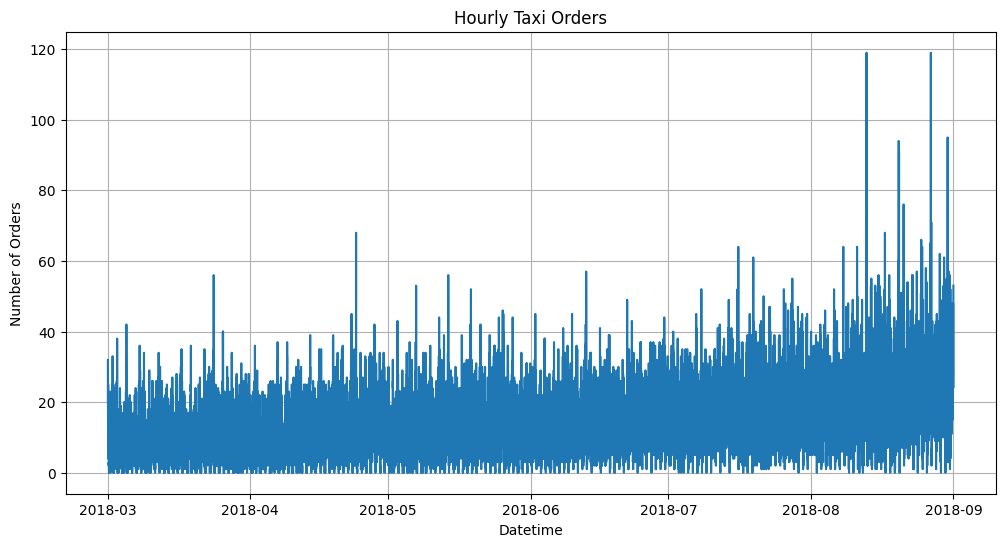

In [29]:
# Plotting the number of order per hour 
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['num_orders'])
plt.title('Hourly Taxi Orders')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

from the plot above
* Slight upward trend in the number of orders over time.
* Recurring patterns suggesting daily/weekly cycles.
* Occasional spikes of high demand, especially later in the period.

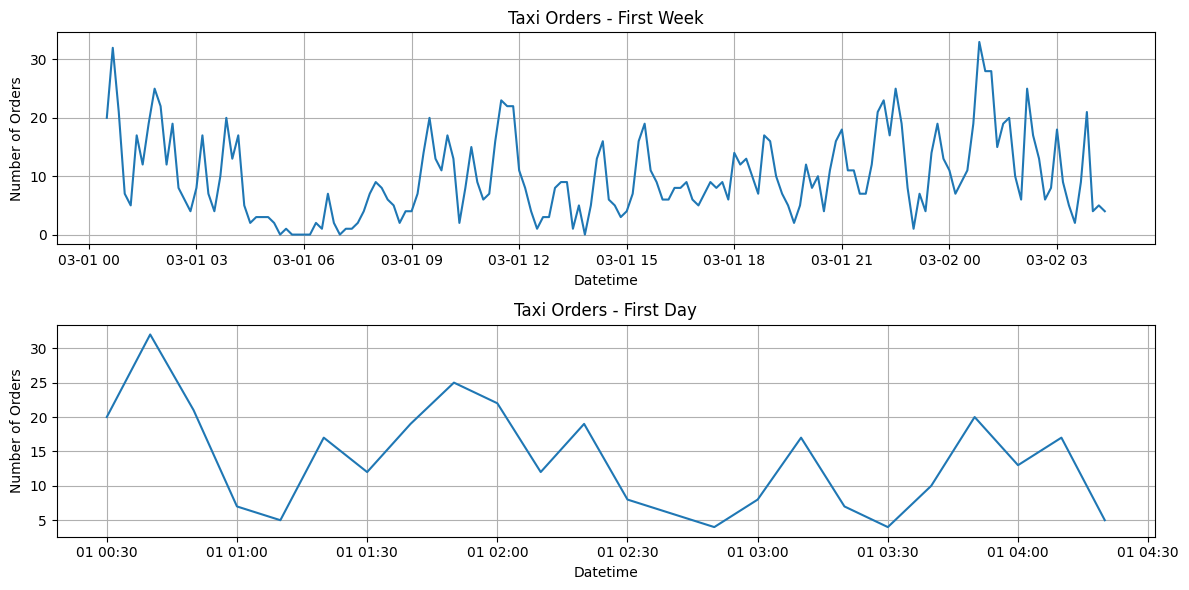

In [30]:
#  plotting the number of orders for the first week and first day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_hourly.index[:24*7], df_hourly['num_orders'][:24*7]) # First week
plt.title('Taxi Orders - First Week')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df_hourly.index[:24], df_hourly['num_orders'][:24]) # First day
plt.title('Taxi Orders - First Day')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.grid(True)

plt.tight_layout()
plt.show()

From the above plots 
* Weekly: Clear daily fluctuations within the week, with some days showing consistently higher or lower order volumes than others.
* Daily: Stronger cyclical pattern within the day, likely indicating peak and off-peak hours for taxi demand.

## Training

In [31]:
# training model for Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [32]:
# training model for LightGBM
model_lgb = lgb.LGBMRegressor(random_state =42)
model_lgb.fit(X_train,y_train)

LGBMRegressor(random_state=42)

## Testing

In [33]:
# testing the Linear Regression Model
pred_lr = model_lr.predict(X_test)
rmse_lr=np.sqrt(mean_squared_error(y_test, pred_lr))
print(f'Linear Regression RMSE on the test set is: {rmse_lr:.2f}')

Linear Regression RMSE on the test set is: 8.60


In [34]:
pred_lgb = model_lgb.predict(X_test)
rmse_lgb=np.sqrt(mean_squared_error(y_test,pred_lgb))
print(f'LightGBM RMSE on the test set is : {rmse_lgb:.2f}')

LightGBM RMSE on the test set is : 8.72


In [35]:
# Evaluating the different models

print("\n--- Model Evaluation ---")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"LightGBM RMSE: {rmse_lgb:.2f}")

if rmse_lr <= 48:
    print("\nLinear Regression meets the RMSE requirement.")
else:
    print("\nLinear Regression does not meet the RMSE requirement.")

if rmse_lgb <= 48:
    print("LightGBM meets the RMSE requirement.")
else:
    print("LightGBM does not meet the RMSE requirement.")


--- Model Evaluation ---
Linear Regression RMSE: 8.60
LightGBM RMSE: 8.72

Linear Regression meets the RMSE requirement.
LightGBM meets the RMSE requirement.


**Linear Regression performed slightly better (lower RMSE) on the test set than LightGBM in this case. Both models significantly beat the target RMSE of 48.**

## **CONCLUSION**
Both the Linear Regression and LightGBM models achieved RMSE scores significantly below the target of 48, indicating they are quite effective at predicting the number of taxi orders for the next hour based on the historical data and engineered features. In this specific evaluation, the simpler Linear Regression model slightly outperformed LightGBM. Therefore, either model could be used for the company's goal of predicting taxi orders to better manage driver availability during peak hours. Further improvements might be possible through more advanced feature engineering or hyperparameter tuning.

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48